In [1]:
# Perform the following operations using Python by creating a student performance dataset.
# 1.	Display Missing Values
# 2.	Drop the missing values 
# 3.	Identify outliers using  box plot and scatter plot
# 4.	Handle outlier using any technique
# 5.	Perform any 2 data normalization technique


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data={
    'name':['A','B','C','D','E'],
    'math':[85,90,np.nan,45,100],
    'science':[88,95,89,30,105],
    'english':[78,82,85,40,np.nan]
}

In [5]:
df=pd.DataFrame(data)
df

,name,math,science,english
0,A,85.0,88,78.0
1,B,90.0,95,82.0
2,C,NaN,89,85.0
3,D,45.0,30,40.0
4,E,100.0,105,NaN


In [7]:
# 1. Display missing values
print(df.isnull().sum)

<bound method DataFrame.sum of     name   math  science  english
0  False  False    False    False
1  False  False    False    False
2  False   True    False    False
3  False  False    False    False
4  False  False    False     True>


In [15]:
#2. Drop missing value
df=df.dropna()
df

,name,math,science,english
0,A,85.0,88,78.0
1,B,90.0,95,82.0
3,D,45.0,30,40.0


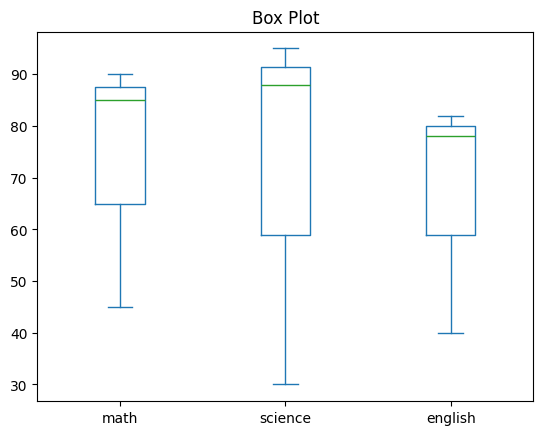

In [16]:
#3 Box plot and Scatter plot
df[['math','science','english']].plot(kind='box',title='Box Plot')
plt.show()

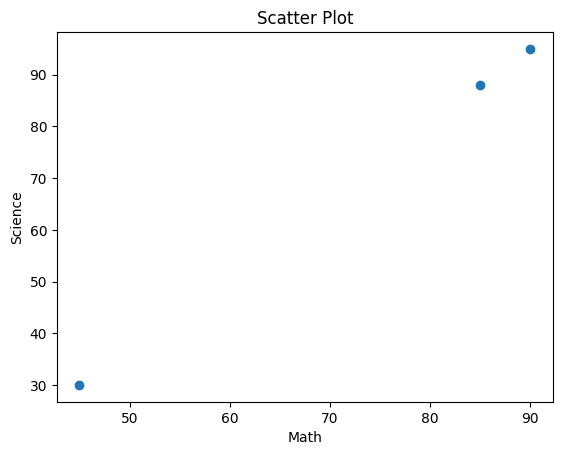

In [18]:
# Scatter plot
plt.scatter(df['math'],df['science'])
plt.xlabel('Math')
plt.ylabel('Science')
plt.title('Scatter Plot')
plt.show()


In [20]:
# 4. Handle outliers by clipping
df['math'] = df['math'].clip(0, 100)
df['science'] = df['science'].clip(0, 100)
df['english'] = df['english'].clip(0, 100)

df[['math', 'science', 'english']].describe()

,math,science,english
count,3.000000,3.000000,3.000000
mean,73.333333,71.000000,66.666667
std,24.664414,35.679126,23.180452
min,45.000000,30.000000,40.000000
25%,65.000000,59.000000,59.000000
50%,85.000000,88.000000,78.000000
75%,87.500000,91.500000,80.000000
max,90.000000,95.000000,82.000000


In [23]:
#min max
df['math_minmax'] = (df['math'] - df['math'].min()) / (df['math'].max() - df['math'].min())
df

,name,math,science,english,math_minmax
0,A,85.0,88,78.0,0.888889
1,B,90.0,95,82.0,1.000000
3,D,45.0,30,40.0,0.000000


In [24]:
# Z-Score
df['math_zscore'] = (df['math'] - df['math'].mean()) / df['math'].std()
df

,name,math,science,english,math_minmax,math_zscore
0,A,85.0,88,78.0,0.888889,0.473016
1,B,90.0,95,82.0,1.000000,0.675737
3,D,45.0,30,40.0,0.000000,-1.148754
